<a href="https://colab.research.google.com/github/jyothirmai318/Data-Analysis/blob/main/Data_Analysis_Resampling_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resampling Techniques

###Probability Example

Here we will review the difference between sampling with and without replacement. We will calculate the probability of an event using simulation.Consider a bowl filled with colored candies - three blue, two green, and five yellow. Draw three candies at random, with replacement and without replacement. You want to know the probability of drawing a yellow candy on the third draw given that the first candy was blue and the second candy was green.

In [ ]:
import numpy as np
np.random.seed(123)

# Set up the bowl
success_rep, success_no_rep, sims = 0, 0, 10000
bowl = ['b', 'b', 'b', 'g', 'g', 'y', 'y', 'y', 'y', 'y']

for i in range(sims):
    # Sample with and without replacement & increment success counters
    sample_rep = np.random.choice(bowl, size=3, replace=True)
    sample_no_rep = np.random.choice(bowl, size=3, replace=False)
    if (sample_rep[0] == 'b') & (sample_rep[1] == 'g') & (sample_rep[2] == 'y'):
        success_rep += 1
    if (sample_no_rep[0] == 'b') & (sample_no_rep[1] == 'g') & (sample_no_rep[2] == 'y'):
        success_no_rep += 1

# Calculate probabilities
prob_with_replacement = success_rep / sims
prob_without_replacement = success_no_rep / sims
print("Probability with replacement = {}, without replacement = {}".format(prob_with_replacement,
                                                                           prob_without_replacement))

Probability with replacement = 0.0266, without replacement = 0.0415


####Question 1(a)

Calculate the probability using simulation. A box contains 10 white balls, 20 reds and 30 greens. Draw 5 balls with replacement. What is the probability that
a. 3 white or 2 red
b. All 5 are the same color

In [ ]:
np.random.seed(123)
success_a, success_b, sims = 0, 0, 10000
bowl = ['white'] * 10 + ['red'] * 20 + ['green'] * 30
for i in range(sims):
    sample = np.random.choice(bowl, size=5, replace=True)
    if (np.sum(sample == 'white') == 3) or (np.sum(sample == 'red') == 2):
        success_a += 1
    if len(set(sample)) == 1:
        success_b += 1
prob_a = success_a / sims
prob_b = success_b / sims

print("Probability of 3 white or 2 red:", prob_a)
print("Probability that all 5 are the same color:", prob_b)


Probability of 3 white or 2 red: 0.36
Probability that all 5 are the same color: 0.0367


####Question 1(b):

Two unbiased dice are thrown once and the total score is observed. Use a simulation to find the estimated probability that the total score is even or greater than 7.

In [ ]:
#Write your code here
np.random.seed(123)
success_a,sims = 0,10000
for i in range(sims):
    die1 = np.random.randint(1, 6)
    die2 = np.random.randint(1, 6)
    total_score = die1 + die2
    if (total_score % 2 == 0) or (total_score > 7):
        success_a += 1
probability = success_a / sims
print("Estimated probability that the total score is even or greater than 7:", probability)


Estimated probability that the total score is even or greater than 7: 0.5988


###BootStrapping

In [ ]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

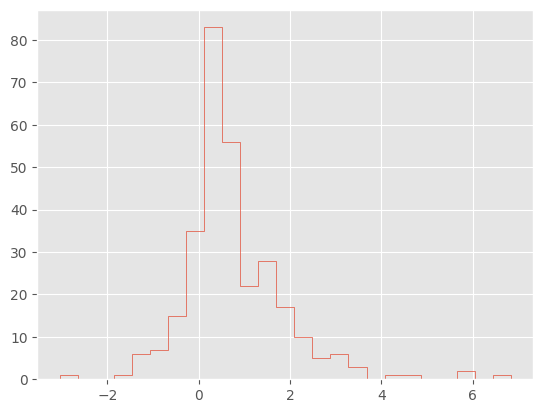

In [ ]:
# For example, what is the 95% confidence interval for
# the mean of this data set if you didn't know how it was generated?

x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step');

In [ ]:
n = len(x)
reps = 10000
xb = np.random.choice(x, (n, reps))
mb = xb.mean(axis=0)
mb.sort()

np.percentile(mb, [2.5, 97.5])

array([0.6382, 0.8901])

###Reprise of bootstrap example for Monte Carlo integration

In [ ]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

In [ ]:
# data sample for integration
n = 100
x = f(np.random.random(n))

In [ ]:
# bootstrap MC integration
reps = 1000
xb = np.random.choice(x, (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)

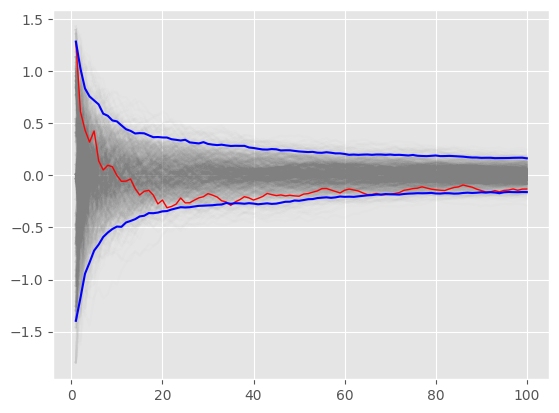

In [ ]:
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');

###BootStrap Example

###Running a Simple BootStrap

Suppose you own a factory that produces wrenches. You want to be able to characterize the average length of the wrenches and ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use bootstrapping to get the 95% confidence interval (CI) for the average lengths.

In [ ]:
wrench_lengths = np.array([ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975,
       11.65143654,  7.57332076,  9.57108737, 11.26593626,  9.1332596 ,
        9.32111385,  9.90529103, 11.49138963,  9.361098  ,  9.55601804,
        9.56564872, 12.20593008, 12.18678609, 11.0040539 , 10.3861864 ,
       10.73736858, 11.49073203,  9.06416613, 11.17582904,  8.74611933,
        9.3622485 , 10.9071052 ,  8.5713193 ,  9.85993128,  9.1382451 ,
        9.74438063,  7.20141089,  8.2284669 ,  9.30012277, 10.92746243,
        9.82636432, 10.00284592, 10.68822271,  9.12046366, 10.28362732,
        9.19463348,  8.27233051,  9.60910021, 10.57380586, 10.33858905,
        9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334,
        8.70591468,  8.96121179, 11.74371223,  9.20193726, 10.02968323,
       11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267,
        9.22729129, 10.79486267, 10.31427199,  8.67373454, 11.41729905,
       10.80723653, 10.04549008,  9.76690794,  8.80169886, 10.19952407,
       10.46843912,  9.16884502, 11.16220405,  8.90279695,  7.87689965,
       11.03972709,  9.59663396,  9.87397041,  9.16248328,  8.39403724,
       11.25523737,  9.31113102, 11.66095249, 10.80730819,  9.68524185,
        8.9140976 ,  9.26753801,  8.78747687, 12.08711336, 10.16444123,
       11.15020554,  8.73264795, 10.18103513, 11.17786194,  9.66498924,
       11.03111446,  8.91543209,  8.63652846, 10.37940061,  9.62082357])

In [ ]:
np.random.seed(123)

# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, replace=True, size=len(wrench_lengths))
    sample_mean = np.mean(temp_sample)
    mean_lengths.append(sample_mean)

# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_lengths)
boot_95_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 10.0270443060217, 95% CI = [ 9.8045 10.2577]


Calculate the 95% bootstrapped confidence interval for the median value.
####data = [7, 9, 10, 10, 12, 14, 15, 16, 16, 17, 19, 20, 21, 21, 23]

In [ ]:
np.random.seed(123)
data = [7, 9, 10, 10, 12, 14, 15, 16, 16, 17, 19, 20, 21, 21, 23]
median_length, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(data, replace=True, size=len(data))
    sample_median = np.median(temp_sample)
    median_length.append(sample_median)
boot_median = np.median(median_length)
boot_95_ci = np.percentile(median_length, [2.5, 97.5])

print("Bootstrapped Median = {}, 95% CI = {}".format(boot_median, boot_95_ci))


Bootstrapped Median = 16.0, 95% CI = [11.95 20.  ]


###Leave one out cross validation

###1. import all the required libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

###2. Create the data

In [ ]:
df = pd.DataFrame({'y': [6, 8, 12, 14, 14, 15, 17, 22, 24, 23],
                   'x1': [2, 5, 4, 3, 4, 6, 7, 5, 8, 9],
                   'x2': [14, 12, 12, 13, 7, 8, 7, 4, 6, 5]})

###3. Performing leave one out cross validation to evaluate the performance

In [ ]:
#define predictor and response variables
X = df[['x1', 'x2']]
y = df['y']

#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

3.1461548083469726

###4. Evaluating the models performance using root mean squared error(RMSE)

In [ ]:
#define predictor and response variables
X = df[['x1', 'x2']]
y = df['y']

#define cross-validation method to use
cv = LeaveOneOut()

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))


3.619456476385567

Create the data of your own. Perform leave one out cross validation (LOOCV) and calculate mean absolute Error and Root mean Squared Error.

In [ ]:
data = pd.DataFrame({
    'y': [5, 7, 9, 10, 11, 13, 15, 18, 20, 21],
    'x1': [1, 3, 5, 6, 7, 9, 10, 12, 14, 16],
    'x2': [11, 10, 9, 6, 5, 7, 6, 8, 9, 12]
})

X = data[['x1', 'x2']]
y = data['y']
cv = LeaveOneOut()
model = LinearRegression()

mae_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
mean_absolute_error_result = -np.mean(mae_scores)

mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
root_mean_squared_error_result = np.sqrt(-np.mean(mse_scores))  # Convert to positive and take square root

print("Mean Absolute Error:", mean_absolute_error_result)
print("Root Mean Squared Error:", root_mean_squared_error_result)


Mean Absolute Error: 0.6798549218198184
Root Mean Squared Error: 0.8807516436124264


###JackKnife Estimate of Parameters

In [ ]:
def jackknife(x, func):
    """Jackknife estimate of the estimator func"""
    n = len(x)
    idx = np.arange(n)
    return np.sum(func(x[idx!=i]) for i in range(n))/float(n)

In [ ]:
# Jackknife estimate of standard deviation
x = np.random.normal(0, 2, 100)
jackknife(x, np.std)

<ipython-input-23-b8512b39dc37>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(func(x[idx!=i]) for i in range(n))/float(n)


2.024516859179026

In [ ]:
def jackknife_var(x, func):
    """Jackknife estiamte of the variance of the estimator func."""
    n = len(x)
    idx = np.arange(n)
    j_est = jackknife(x, func)
    return (n-1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0
                                    for i in range(n))

In [ ]:
# estimate of the variance of an estimator
jackknife_var(x, np.std)

<ipython-input-23-b8512b39dc37>:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(func(x[idx!=i]) for i in range(n))/float(n)
<ipython-input-25-e3604052b0eb>:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return (n-1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0


0.02287893371765606

##Example

####Jackknife confidence interval for the median

In this exercise, we will calculate the jackknife 95% CI for a non-standard estimator. Here, we will look at the median. Keep in mind that the variance of a jackknife estimator is n-1 times the variance of the individual jackknife sample estimates where n is the number of observations in the original sample. Here, you are now estimating the median length of the wrenches along with a 95% CI to ensure that the wrenches are within tolerance.**(Using the data of wrench_lengths provided in the bootstrap example)**

In [ ]:
np.random.seed(123)

# Leave one observation out to get the jackknife sample and store the median length
median_lengths = []
index = np.arange(n)
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    median_lengths.append(np.median(jk_sample))

median_lengths = np.array(median_lengths)

# Calculate jackknife estimate and it's variance
jk_median_length = np.mean(median_lengths)
jk_var = (n-1)*np.var(median_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = jk_median_length - 1.96 * np.sqrt(jk_var)
jk_upper_ci = jk_median_length + 1.96 * np.sqrt(jk_var)
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_lower_ci, jk_upper_ci))

Jackknife 95% CI lower = 9.138592415216381, upper = 10.754868124783625


##Task 4:**(20%)**
Basic Jackknife estimation - mean



Calculate jackknife estimate for the mean. You own a wrench factory and want to measure the average length of the wrenches to ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use jackknife estimation to get the average lengths.**(Use the data of wrench lengths provided in the bootstrap example)**.

In [ ]:
import numpy as np
n = len(wrench_lengths)
np.random.seed(123)
mean_lengths = []
index = np.arange(n)
for i in range(n):
    jk_sample = np.array(wrench_lengths)[index != i]
    mean_lengths.append(np.mean(jk_sample))

mean_lengths = np.array(mean_lengths)

jk_mean_length = np.mean(mean_lengths)
jk_var = (n - 1) * np.var(mean_lengths)

jk_lower_ci = jk_mean_length - 1.96 * np.sqrt(jk_var)
jk_upper_ci = jk_mean_length + 1.96 * np.sqrt(jk_var)

print("Jackknife Mean Length Estimate:", jk_mean_length)
print("Jackknife 95% CI lower =", jk_lower_ci, ", upper =", jk_upper_ci)


Jackknife Mean Length Estimate: 10.027109074099998
Jackknife 95% CI lower = 9.804859903949128 , upper = 10.24935824425087
